**DOWNLOAD IMPORTANT LIBRARY**

In [ ]:
# Install important libraries
!pip install optuna catboost xgboost plotly lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 32.9 MB/s eta 0:00:00


DOWNLOAD RAW DATA JSON FILES

In [ ]:
# Download fire data zip file from Google Drive using gdown (fuzzy matching is enabled)
!gdown --fuzzy "https://drive.google.com/file/d/1o23cobXA8XYcuaufad8dkWimZMPtwPdY/view?usp=drive_link"
# Unzip the downloaded file
!unzip "/content/su_sar_moisture_content-20250112T190910Z-001.zip"

Streaming output truncated to the last 5000 lines.
  inflating: su_sar_moisture_content/su_sar_moisture_content_1197/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_content_1458/stac.json  
  inflating: su_sar_moisture_content/su_sar_moisture_content_1917/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_content_0011/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_content_2484/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_content_1296/stac.json  
  inflating: su_sar_moisture_content/su_sar_moisture_content_1296/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_content_1557/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_content_0110/stac.json  
  inflating: su_sar_moisture_content/su_sar_moisture_content_0729/stac.json  
  inflating: su_sar_moisture_content/su_sar_moisture_content_2187/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_con

In [ ]:
# Go into downloaded forder
%cd /content/su_sar_moisture_content
!ls

/content/su_sar_moisture_content
collection.json		      su_sar_moisture_content_0872  su_sar_moisture_content_1745
_common			      su_sar_moisture_content_0873  su_sar_moisture_content_1746
su_sar_moisture_content_0001  su_sar_moisture_content_0874  su_sar_moisture_content_1747
su_sar_moisture_content_0002  su_sar_moisture_content_0875  su_sar_moisture_content_1748
su_sar_moisture_content_0003  su_sar_moisture_content_0876  su_sar_moisture_content_1749
su_sar_moisture_content_0004  su_sar_moisture_content_0877  su_sar_moisture_content_1750
su_sar_moisture_content_0005  su_sar_moisture_content_0878  su_sar_moisture_content_1751
su_sar_moisture_content_0006  su_sar_moisture_content_0879  su_sar_moisture_content_1752
su_sar_moisture_content_0007  su_sar_moisture_content_0880  su_sar_moisture_content_1753
su_sar_moisture_content_0008  su_sar_moisture_content_0881  su_sar_moisture_content_1754
su_sar_moisture_content_0009  su_sar_moisture_content_0882  su_sar_moisture_content_1755
su_sar_mo

CREATE COMBINED DATAFRAME FROM RAW DATA

In [ ]:
import pandas as pd
import os

# Define the base path for your files
base_path = '/content/su_sar_moisture_content'


# Function to process and merge files
def process_files(start, end, folder_prefix, base_path):
    # Read the first JSON file
    file_path = os.path.join(base_path, 'su_sar_moisture_content_0001', 'labels.geojson')
    df = pd.read_json(file_path)
    df = df.T
    df['type'][1] = df['type'][2]
    df['coordinates'][1] = df['coordinates'][2]
    df = df.drop(['type', 'geometry'])
    df = df.dropna(axis=1)
    df_merged = pd.DataFrame().reindex_like(df)

    for i in range(start, end):
        # Construct the file path dynamically
        folder_name = f'{folder_prefix}_{str(i).zfill(4)}'
        file_path = os.path.join(base_path, folder_name, 'labels.geojson')
        if os.path.exists(file_path):
            df = pd.read_json(file_path)
            df = df.T
            df['type'][1] = df['type'][2]
            df['coordinates'][1] = df['coordinates'][2]
            df = df.drop(['type', 'geometry'])
            df = df.dropna(axis=1)
            df_merged = pd.concat([df, df_merged])
        else:
            print(f"File not found: {file_path}")
    return df_merged

# Create merged data frames for different ranges
df_merged1 = process_files(1, 10, 'su_sar_moisture_content', base_path)
df_merged2 = process_files(10, 100, 'su_sar_moisture_content', base_path)
df_merged3 = process_files(100, 1000, 'su_sar_moisture_content', base_path)
df_merged4 = process_files(1000, 2616, 'su_sar_moisture_content', base_path)

# Combine all data frames and drop NaN values
df_merged = pd.concat([df_merged1, df_merged2, df_merged3, df_merged4])
df_merged = df_merged.dropna()
df_merged['date']=pd.to_datetime(df_merged['date'])
df_merged=df_merged.sort_values(by='date')
df_merged.set_index('date', inplace=True)
df_merged.to_csv("/content/su_sar_moisture_content.csv")

# Display the final merged DataFrame
df_merged


Streaming output truncated to the last 5000 lines.
  df['type'][1] = df['type'][2]
<ipython-input-4-be42f64eb7f4>:27: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df['type'][1] = df['type'][2]
<ipython-input-4-be42f64eb7f4>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['coordinates'][1] = df['coordinates'][2]
<ipython-input-4-be42f64eb7f4>:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will neve

,percent(t),site,slope(t),elevation(t),canopy_height(t),forest_cover(t),silt(t),sand(t),clay(t),vv(t),...,vh_green(t-3),vh_blue(t-3),vh_swir(t-3),vh_nir(t-3),vh_ndvi(t-3),vh_ndwi(t-3),vh_nirv(t-3),vh_vv(t-3),type,coordinates
date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,150.666667,Great Divide,0.82335,2176.0,0.0,140.0,19.0,65.0,16.0,-13.406858,...,-0.011424,-0.012656,-0.00952,-0.008342,-92.056431,847.243596,-0.060305,-7.911011,Point,"[-107.8536111, 40.7575]"
2015-06-30,113.0,D07_Cimarron River,0.867365,1037.0,8.0,140.0,49.0,23.0,28.0,-11.467708,...,-0.022369,-0.030546,-0.007236,-0.011129,-89.832345,95.372903,-0.049397,-7.005054,Point,"[-101.9038889, 37.12055556]"
2015-06-30,184.333333,Squaw Peak,10.14787,2034.0,23.0,140.0,38.0,42.0,20.0,-2.705159,...,-0.012028,-0.016215,-0.004372,-0.005435,-38.037932,98.001466,-0.019467,-7.249351,Point,"[-111.625, 40.30111111]"
2015-06-30,73.166667,Los Alamos,1.629689,915.0,13.0,110.0,20.0,67.0,13.0,-8.305405,...,-0.016877,-0.024498,-0.00676,-0.007288,-44.129067,398.293979,-0.021555,-8.205378,Point,"[-118.8186111, 34.70138889]"
2015-06-30,106.0,D07_Cimarron South,0.144942,1028.0,0.0,30.0,16.0,75.0,9.0,-13.08707,...,-0.028164,-0.037641,-0.007885,-0.013206,-96.592422,94.337008,-0.053716,-8.917826,Point,"[-101.6708333, 37.07361111]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31,243.0,RGPL_Dimmit_TX,0.26373,186.0,4.0,140.0,17.0,70.0,13.0,-11.371539,...,-0.020372,-0.039701,-0.005555,-0.006122,-31.541664,364.592988,-0.013008,-4.87439,Point,"[-99.39416667, 28.3]"
2019-01-31,94.0,NOTX_Hood_TX,0.223147,228.0,0.0,140.0,22.0,61.0,17.0,-10.408519,...,-0.027975,-0.046888,-0.008906,-0.007488,-29.093055,-192.406971,-0.013087,-6.048708,Point,"[-97.82416667, 32.45777778]"
2019-01-31,203.5,"Trippet Ranch, Topanga",2.421903,324.0,24.0,70.0,37.0,39.0,24.0,-7.477246,...,-0.031832,-0.042221,-0.010008,-0.009477,-27.244698,-517.120618,-0.01831,-5.823875,Point,"[-118.5977778, 34.09333333]"


**PREPROCESS DATA FOR ML TASK**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import sklearn.metrics
import optuna

# Ensure TensorFlow is using GPU
print("TensorFlow GPU Available:", tf.config.list_physical_devices('GPU'))

# Load data
data = pd.read_csv("/content/su_sar_moisture_content.csv")

# Prepare data
y = data['percent(t)'].values
X = data.drop(['percent(t)', 'date', 'type', 'coordinates', 'site'], axis=1).values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

train_x, valid_x, train_y, valid_y = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


TensorFlow GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


LIGHT GBM MODEL

In [ ]:
# LightGBM Model with CPU
def lightgbm_objective(trial):
    dtrain = lgb.Dataset(train_x, label=train_y)
    param = {
        "objective": "regression",
        "metric": "RMSE",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "device": "cpu",  # Enable GPU
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(valid_x)
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
    return rmse

# Run Optuna for each model
lightgbm_study = optuna.create_study(direction="minimize")
lightgbm_study.optimize(lightgbm_objective, n_trials=100)

# Print best results
print("LightGBM Best Trial:")
print(lightgbm_study.best_trial)

[I 2025-01-14 17:06:11,876] A new study created in memory with name: no-name-d682f74a-6f50-4339-958c-3fab0f4623e3
[I 2025-01-14 17:06:12,951] Trial 0 finished with value: 23.55470222666855 and parameters: {'lambda_l1': 1.0756835233269048e-05, 'lambda_l2': 0.044197782928341395, 'num_leaves': 34, 'feature_fraction': 0.8563712607181275, 'bagging_fraction': 0.4021834293201163, 'bagging_freq': 2, 'min_child_samples': 40}. Best is trial 0 with value: 23.55470222666855.
[I 2025-01-14 17:06:15,573] Trial 1 finished with value: 21.076112964647997 and parameters: {'lambda_l1': 0.001984920029364715, 'lambda_l2': 0.00010563982688564311, 'num_leaves': 28, 'feature_fraction': 0.5700025865923595, 'bagging_fraction': 0.6823284049953621, 'bagging_freq': 1, 'min_child_samples': 26}. Best is trial 1 with value: 21.076112964647997.
[I 2025-01-14 17:06:16,136] Trial 2 finished with value: 22.165101230992086 and parameters: {'lambda_l1': 3.800246497314303, 'lambda_l2': 0.0004094600558558237, 'num_leaves': 1

LightGBM Best Trial:
FrozenTrial(number=76, state=TrialState.COMPLETE, values=[20.199150122893613], datetime_start=datetime.datetime(2025, 1, 14, 17, 8, 29, 569253), datetime_complete=datetime.datetime(2025, 1, 14, 17, 8, 31, 172982), params={'lambda_l1': 4.580772350861174, 'lambda_l2': 1.0003849248869476, 'num_leaves': 215, 'feature_fraction': 0.49635975732174303, 'bagging_fraction': 0.9801989891850392, 'bagging_freq': 6, 'min_child_samples': 12}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lambda_l1': FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'lambda_l2': FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'num_leaves': IntDistribution(high=256, log=False, low=2, step=1), 'feature_fraction': FloatDistribution(high=1.0, log=False, low=0.4, step=None), 'bagging_fraction': FloatDistribution(high=1.0, log=False, low=0.4, step=None), 'bagging_freq': IntDistribution(high=7, log=False, low=1, step=1), 'min_child_samples': IntDistribu

In [ ]:
# Prediction and plotting part
best_params = lightgbm_study.best_trial.params
gbm = lgb.LGBMRegressor(**best_params)
gbm.fit(train_x, train_y, eval_metric='rmse')

# Predictions
preds = gbm.predict(valid_x)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
print(f"RMSE: {RMSE}")
RMSE_percent = (RMSE / np.mean(valid_y)) * 100
print(f"RMSE_percent: {RMSE_percent}")
r2score = sklearn.metrics.r2_score(valid_y, preds)
print(f"R2Score: {r2score}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RMSE: 20.199150122893613
RMSE_percent: 19.428592377327462
R2Score: 0.7304555297096427


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


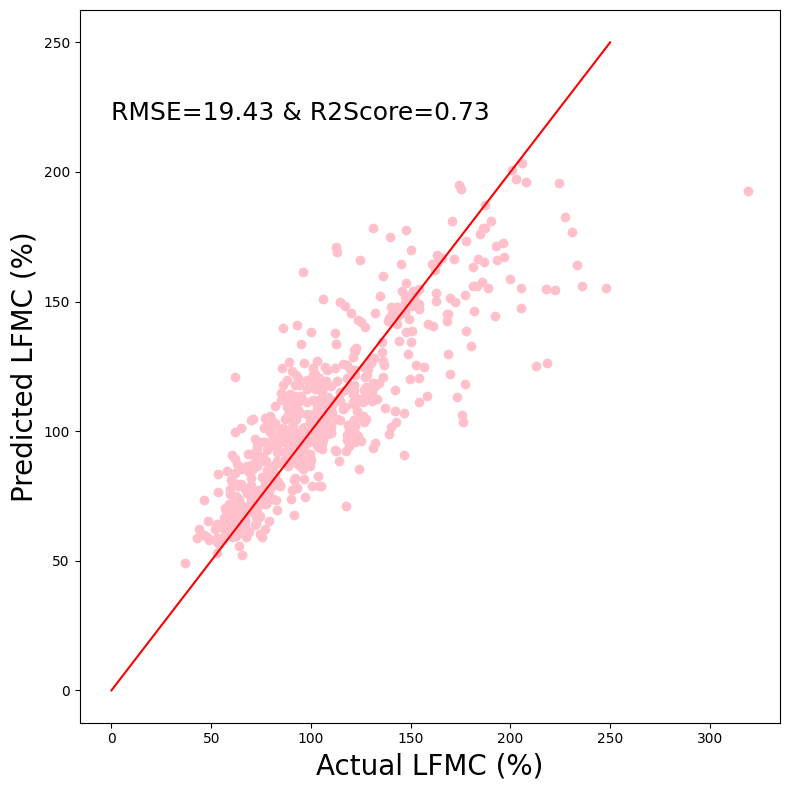

In [ ]:
# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(valid_y, preds, color='pink')
x = np.arange(0, 300, 50)
y = np.arange(0, 300, 50)
plt.plot(x, y, color='red')
plt.text(0, 220, f'RMSE={RMSE_percent:.2f} & R2Score={r2score:.2f}', fontsize=18)
plt.xlabel('Actual LFMC (%)', fontsize=20)
plt.ylabel('Predicted LFMC (%)', fontsize=20)
plt.tight_layout()
plt.show()



In [ ]:
import plotly.express as px
data = pd.read_csv("/content/su_sar_moisture_content.csv")
# Reset index to make 'date' a regular column
data.reset_index(drop=True, inplace=True)
# Convert the 'date' column to datetime format with the correct format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
# Set the 'date' column as the index
data.set_index('date', inplace=True)
data = data.loc['2018-09':'2018-09'].reset_index(drop=True)  # Select data for September 2018

y = data['percent(t)'].values
X = data.drop(['percent(t)', 'type', 'coordinates', 'site'], axis=1).values
X = scaler.transform(X)
pred = gbm.predict(X)
data.insert(0, 'Predicted LFMC', pred)  # Insert predicted LFMC into DataFrame

lon=[]
lat=[]

for i in range(0,data.shape[0]):
    s=list(data.coordinates[i].split(','))
    x=float(s[0][1:])
    lon.append(x)
    y=float(s[1][:-1])
    lat.append(y)

data.insert(141,'lat',lat)
data.insert(141,'lon',lon)

# Plot actual LFMC
color_scale = [(0, 'red'), (0.30, 'yellow'), (1, 'green')]  # Define color scale
fig = px.scatter_mapbox(data,
                        title='Actual LFMC for month Sep 2018',  # Update title to reflect correct month/year
                        lat="lat",
                        lon="lon",
                        hover_name="site",
                        range_color=(0, 300),
                        hover_data=["percent(t)"],  # Update hover data to use original column name
                        color="percent(t)",  # Update color to use original column name
                        color_continuous_scale=color_scale,
                        size="forest_cover(t)",
                        height=800,
                        zoom=4,
                        width=1000)
fig.update_layout(mapbox_style="open-street-map", autosize=True)
fig.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 0})
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Plot predicted LFMC
fig = px.scatter_mapbox(data,
                        lat="lat",
                        lon="lon",
                        range_color=(0, 300),
                        hover_name="site",
                        hover_data=["Predicted LFMC"],
                        color="Predicted LFMC",
                        color_continuous_scale=color_scale,
                        size="forest_cover(t)",
                        height=800,
                        zoom=4,
                        width=1000)
fig.update_layout(mapbox_style="open-street-map", autosize=True, title='Predicted LFMC for month Sep 2020')
fig.update_layout(margin={"r":0, "t":50, "l":0, "b":0})
fig.show()

CATBOOST MODEL

In [ ]:
# CatBoost Model with GPU
def catboost_objective(trial):
    param = {
        "loss_function": trial.suggest_categorical("loss_function", ["RMSE"]),
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e0),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-2, 1e0),
        # "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 10),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 20),
        "one_hot_max_size": trial.suggest_int("one_hot_max_size", 2, 20),
        'rsm': 1.0,
        "task_type": "GPU",  # Enable GPU
        "devices": "0",  # Specify GPU device
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
    model = CatBoostRegressor(**param)
    model.fit(train_x, train_y, verbose=0)
    preds = model.predict(valid_x)
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
    return rmse

catboost_study = optuna.create_study(direction="minimize")
catboost_study.optimize(catboost_objective, n_trials=100)

print("CatBoost Best Trial:")
print(catboost_study.best_trial)

[I 2025-01-14 17:49:22,724] A new study created in memory with name: no-name-ffa0dfb9-08ae-474b-826e-e086ff194016
[I 2025-01-14 17:49:32,780] Trial 0 finished with value: 21.703718395571755 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.2137431876928484, 'l2_leaf_reg': 0.6606160338100712, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'min_data_in_leaf': 9, 'one_hot_max_size': 4, 'subsample': 0.5967166258265217}. Best is trial 0 with value: 21.703718395571755.
[I 2025-01-14 17:49:34,764] Trial 1 finished with value: 25.69237111298742 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.5529263307154263, 'l2_leaf_reg': 0.48929661977830347, 'depth': 1, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'min_data_in_leaf': 11, 'one_hot_max_size': 15}. Best is trial 0 with value: 21.703718395571755.
[I 2025-01-14 17:49:47,148] Trial 2 finished with value: 23.212030906491517 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.419918326287

CatBoost Best Trial:
FrozenTrial(number=84, state=TrialState.COMPLETE, values=[20.419331337712965], datetime_start=datetime.datetime(2025, 1, 14, 18, 3, 30, 824652), datetime_complete=datetime.datetime(2025, 1, 14, 18, 3, 40, 666727), params={'loss_function': 'RMSE', 'learning_rate': 0.10564442052099407, 'l2_leaf_reg': 0.964234332293594, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'min_data_in_leaf': 3, 'one_hot_max_size': 13, 'subsample': 0.8061847818594706}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'loss_function': CategoricalDistribution(choices=('RMSE',)), 'learning_rate': FloatDistribution(high=1.0, log=False, low=1e-05, step=None), 'l2_leaf_reg': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'depth': IntDistribution(high=10, log=False, low=1, step=1), 'boosting_type': CategoricalDistribution(choices=('Ordered', 'Plain')), 'bootstrap_type': CategoricalDistribution(choices=('Bayesian', 'Bernoulli', 'MVS')), 'min_

In [ ]:
# Prediction and plotting part
best_params = catboost_study.best_trial.params
model = CatBoostRegressor(**best_params)
model.fit(train_x, train_y, verbose=0)

# Predictions
preds = model.predict(valid_x)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
print(f"RMSE: {RMSE}")
RMSE_percent = (RMSE / np.mean(valid_y)) * 100
print(f"RMSE_percent: {RMSE_percent}")
r2score = sklearn.metrics.r2_score(valid_y, preds)
print(f"R2Score: {r2score}")

FrozenTrial(number=84, state=TrialState.COMPLETE, values=[20.419331337712965], datetime_start=datetime.datetime(2025, 1, 14, 18, 3, 30, 824652), datetime_complete=datetime.datetime(2025, 1, 14, 18, 3, 40, 666727), params={'loss_function': 'RMSE', 'learning_rate': 0.10564442052099407, 'l2_leaf_reg': 0.964234332293594, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'min_data_in_leaf': 3, 'one_hot_max_size': 13, 'subsample': 0.8061847818594706}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'loss_function': CategoricalDistribution(choices=('RMSE',)), 'learning_rate': FloatDistribution(high=1.0, log=False, low=1e-05, step=None), 'l2_leaf_reg': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'depth': IntDistribution(high=10, log=False, low=1, step=1), 'boosting_type': CategoricalDistribution(choices=('Ordered', 'Plain')), 'bootstrap_type': CategoricalDistribution(choices=('Bayesian', 'Bernoulli', 'MVS')), 'min_data_in_leaf': IntDis

MLP MODEL

In [ ]:
# MLP Model with TensorFlow (GPU by default if available)
def create_mlp_model(trial):
    n_layers = trial.suggest_int('n_layers', 1, 10)
    n_units = trial.suggest_int('n_units', 32, 512)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)

    model = Sequential()
    for i in range(n_layers):
        if i == 0:
            model.add(Dense(n_units, activation='relu', input_shape=(train_x.shape[1],)))
        else:
            model.add(Dense(n_units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))

    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    return model

def mlp_objective(trial):
    model = create_mlp_model(trial)
    es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    model.fit(train_x, train_y, epochs=100, batch_size=256, verbose=0, validation_split=0.2, callbacks=[es])
    preds = model.predict(valid_x)
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
    return rmse

mlp_study = optuna.create_study(direction="minimize")
mlp_study.optimize(mlp_objective, n_trials=100)

print("MLP Best Trial:")
print(mlp_study.best_trial)

[I 2025-01-14 18:09:54,413] A new study created in memory with name: no-name-175ab145-ad2b-470e-a9c0-c529a0e8b1c9
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-14 18:10:11,518] Trial 0 finished with value: 41.66881987192128 and parameters: {'n_layers': 5, 'n_units': 61, 'dropout_rate': 0.3410754883795149, 'lr': 3.067899281276468e-05}. Best is trial 0 with value: 41.66881987192128.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


[I 2025-01-14 18:10:25,721] Trial 1 finished with value: 33.66279268249821 and parameters: {'n_layers': 4, 'n_units': 480, 'dropout_rate': 0.32263565377169356, 'lr': 5.037647785248877e-05}. Best is trial 1 with value: 33.66279268249821.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 31: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


[I 2025-01-14 18:10:44,269] Trial 2 finished with value: 43.46929356157809 and parameters: {'n_layers': 9, 'n_units': 339, 'dropout_rate': 0.21870119951523864, 'lr': 0.0005030832481100801}. Best is trial 1 with value: 33.66279268249821.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 14: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


[I 2025-01-14 18:10:55,046] Trial 3 finished with value: 58.44789270919815 and parameters: {'n_layers': 5, 'n_units': 181, 'dropout_rate': 0.39392560186004405, 'lr': 0.008145155161782297}. Best is trial 1 with value: 33.66279268249821.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2025-01-14 18:11:04,066] Trial 4 finished with value: 69.05003572488282 and parameters: {'n_layers': 1, 'n_units': 97, 'dropout_rate': 0.28759324066993125, 'lr': 9.572495122879478e-05}. Best is trial 1 with value: 33.66279268249821.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-01-14 18:11:26,280] Trial 5 finished with value: 32.464689758191945 and parameters: {'n_layers': 8, 'n_units': 176, 'dropout_rate': 0.0013904303112697858, 'lr': 8.525581759607001e-05}. Best is trial 5 with value: 32.464689758191945.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 20: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-14 18:11:37,419] Trial 6 finished with value: 40.557611700681065 and parameters: {'n_layers': 5, 'n_units': 193, 'dropout_rate': 0.3662974787032423, 'lr': 0.00015039475633365641}. Best is trial 5 with value: 32.464689758191945.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-14 18:11:55,880] Trial 7 finished with value: 36.24658805457715 and parameters: {'n_layers': 4, 'n_units': 467, 'dropout_rate': 0.38999800422258957, 'lr': 3.5870590094019953e-05}. Best is trial 5 with value: 32.464689758191945.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 13: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-01-14 18:12:09,987] Trial 8 finished with value: 68.66870885683281 and parameters: {'n_layers': 8, 'n_units': 188, 'dropout_rate': 0.437391464095723, 'lr': 0.0004952848259815509}. Best is trial 5 with value: 32.464689758191945.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 43: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-14 18:12:29,430] Trial 9 finished with value: 62.396937749891386 and parameters: {'n_layers': 10, 'n_units': 180, 'dropout_rate': 0.4003942371058283, 'lr': 1.9096481141125624e-05}. Best is trial 5 with value: 32.464689758191945.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 66: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-14 18:12:45,776] Trial 10 finished with value: 33.1218244402784 and parameters: {'n_layers': 7, 'n_units': 317, 'dropout_rate': 0.013412619629799368, 'lr': 0.002352256273048767}. Best is trial 5 with value: 32.464689758191945.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


[I 2025-01-14 18:13:05,114] Trial 11 finished with value: 28.668842378078477 and parameters: {'n_layers': 7, 'n_units': 325, 'dropout_rate': 0.010251351218138574, 'lr': 0.0021690499259399156}. Best is trial 11 with value: 28.668842378078477.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 92: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-01-14 18:13:25,113] Trial 12 finished with value: 29.835885354754826 and parameters: {'n_layers': 7, 'n_units': 380, 'dropout_rate': 0.017216977381117944, 'lr': 0.0017107347102732666}. Best is trial 11 with value: 28.668842378078477.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 73: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-01-14 18:13:53,987] Trial 13 finished with value: 31.912067344501526 and parameters: {'n_layers': 7, 'n_units': 391, 'dropout_rate': 0.11244256694574249, 'lr': 0.001837942151403722}. Best is trial 11 with value: 28.668842378078477.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 49: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


[I 2025-01-14 18:14:19,266] Trial 14 finished with value: 30.058379922675808 and parameters: {'n_layers': 7, 'n_units': 411, 'dropout_rate': 0.12713532016089246, 'lr': 0.002222544889878773}. Best is trial 11 with value: 28.668842378078477.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 71: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-01-14 18:14:30,956] Trial 15 finished with value: 31.71237124689659 and parameters: {'n_layers': 3, 'n_units': 279, 'dropout_rate': 0.08958839764997968, 'lr': 0.009756140990502114}. Best is trial 11 with value: 28.668842378078477.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 30: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-14 18:14:58,402] Trial 16 finished with value: 36.272872609917975 and parameters: {'n_layers': 10, 'n_units': 398, 'dropout_rate': 0.1812403418309429, 'lr': 0.0011865208652294178}. Best is trial 11 with value: 28.668842378078477.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 32: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-14 18:15:13,666] Trial 17 finished with value: 34.72275250291525 and parameters: {'n_layers': 6, 'n_units': 256, 'dropout_rate': 0.06139759459090919, 'lr': 0.004435305462777262}. Best is trial 11 with value: 28.668842378078477.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 15: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


[I 2025-01-14 18:15:28,450] Trial 18 finished with value: 69.58373604079249 and parameters: {'n_layers': 8, 'n_units': 349, 'dropout_rate': 0.4969127106109253, 'lr': 0.0007465071771502298}. Best is trial 11 with value: 28.668842378078477.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-14 18:15:46,785] Trial 19 finished with value: 36.35215752035203 and parameters: {'n_layers': 6, 'n_units': 508, 'dropout_rate': 0.16250689124462536, 'lr': 0.0002799046379547215}. Best is trial 11 with value: 28.668842378078477.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 64: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-01-14 18:15:57,639] Trial 20 finished with value: 32.05434919181492 and parameters: {'n_layers': 2, 'n_units': 258, 'dropout_rate': 0.04594266572785324, 'lr': 0.00551315837052682}. Best is trial 11 with value: 28.668842378078477.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 40: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2025-01-14 18:16:27,873] Trial 21 finished with value: 31.473294652870702 and parameters: {'n_layers': 7, 'n_units': 416, 'dropout_rate': 0.11955507003867022, 'lr': 0.0022896915787793655}. Best is trial 11 with value: 28.668842378078477.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 59: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-14 18:16:53,359] Trial 22 finished with value: 34.01854665514296 and parameters: {'n_layers': 9, 'n_units': 437, 'dropout_rate': 0.06404360168909101, 'lr': 0.003716725791799401}. Best is trial 11 with value: 28.668842378078477.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


[I 2025-01-14 18:17:16,025] Trial 23 finished with value: 28.0717029601284 and parameters: {'n_layers': 7, 'n_units': 368, 'dropout_rate': 0.1472083029381556, 'lr': 0.001096809871995607}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 81: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-01-14 18:17:34,905] Trial 24 finished with value: 31.131986028730726 and parameters: {'n_layers': 6, 'n_units': 309, 'dropout_rate': 0.21718049590090077, 'lr': 0.0011028296347364572}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 43: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2025-01-14 18:17:56,162] Trial 25 finished with value: 31.800372110670143 and parameters: {'n_layers': 9, 'n_units': 360, 'dropout_rate': 0.03364145885020882, 'lr': 0.00031191002539391086}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 37: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-14 18:18:15,985] Trial 26 finished with value: 36.18509777612624 and parameters: {'n_layers': 8, 'n_units': 363, 'dropout_rate': 0.15064207621336445, 'lr': 0.001160462822846497}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-01-14 18:18:35,074] Trial 27 finished with value: 31.658246599533864 and parameters: {'n_layers': 6, 'n_units': 288, 'dropout_rate': 0.08390714961170592, 'lr': 0.0006864817500973301}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 38: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2025-01-14 18:19:02,680] Trial 28 finished with value: 33.7731213550481 and parameters: {'n_layers': 7, 'n_units': 229, 'dropout_rate': 0.00024052998281098859, 'lr': 0.0037377365548018717}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 64: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2025-01-14 18:19:21,195] Trial 29 finished with value: 33.95790846703061 and parameters: {'n_layers': 5, 'n_units': 447, 'dropout_rate': 0.19429713364450485, 'lr': 0.001429420185648243}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-14 18:19:42,454] Trial 30 finished with value: 29.878191393193962 and parameters: {'n_layers': 4, 'n_units': 374, 'dropout_rate': 0.0894681471848083, 'lr': 0.0006716861802510145}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


[I 2025-01-14 18:20:02,010] Trial 31 finished with value: 33.49772458076675 and parameters: {'n_layers': 4, 'n_units': 377, 'dropout_rate': 0.0847989805679226, 'lr': 0.0007207168064718013}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-14 18:20:19,094] Trial 32 finished with value: 31.381469539020173 and parameters: {'n_layers': 4, 'n_units': 322, 'dropout_rate': 0.03704866253453759, 'lr': 0.0001755405926408471}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-14 18:20:36,181] Trial 33 finished with value: 31.061742030485 and parameters: {'n_layers': 3, 'n_units': 431, 'dropout_rate': 0.13922784094512036, 'lr': 0.00042892805056648494}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-14 18:20:57,589] Trial 34 finished with value: 31.18316649879759 and parameters: {'n_layers': 3, 'n_units': 341, 'dropout_rate': 0.28299294836841815, 'lr': 0.0008438036833530556}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 95: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


[I 2025-01-14 18:21:19,502] Trial 35 finished with value: 28.14909898913668 and parameters: {'n_layers': 6, 'n_units': 386, 'dropout_rate': 0.10010853755483218, 'lr': 0.0017454497948615523}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 53: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-01-14 18:21:37,791] Trial 36 finished with value: 33.29297779454798 and parameters: {'n_layers': 6, 'n_units': 49, 'dropout_rate': 0.03205032209648766, 'lr': 0.006453088719416065}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 54: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-14 18:22:08,992] Trial 37 finished with value: 34.96709871713298 and parameters: {'n_layers': 8, 'n_units': 486, 'dropout_rate': 0.23164493231295538, 'lr': 0.002975828255278528}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


[I 2025-01-14 18:22:30,411] Trial 38 finished with value: 35.333572111086454 and parameters: {'n_layers': 5, 'n_units': 144, 'dropout_rate': 0.06286964914626601, 'lr': 0.001559679474945105}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


[I 2025-01-14 18:22:54,841] Trial 39 finished with value: 32.59346334563856 and parameters: {'n_layers': 7, 'n_units': 299, 'dropout_rate': 0.10513039109575831, 'lr': 0.001699287506858606}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 60: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-14 18:23:11,052] Trial 40 finished with value: 35.35309241710824 and parameters: {'n_layers': 5, 'n_units': 229, 'dropout_rate': 0.020002331363515376, 'lr': 0.0029502547288968845}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


[I 2025-01-14 18:23:35,561] Trial 41 finished with value: 35.194071026163776 and parameters: {'n_layers': 6, 'n_units': 374, 'dropout_rate': 0.07630795748290209, 'lr': 0.0009529343081515169}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 30: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


[I 2025-01-14 18:23:56,095] Trial 42 finished with value: 35.40195639513297 and parameters: {'n_layers': 8, 'n_units': 331, 'dropout_rate': 0.1712186631963863, 'lr': 0.0004985432697153105}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2025-01-14 18:24:32,104] Trial 43 finished with value: 30.50657212085554 and parameters: {'n_layers': 7, 'n_units': 385, 'dropout_rate': 0.09807185776085442, 'lr': 0.0002100889045457456}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


[I 2025-01-14 18:24:44,730] Trial 44 finished with value: 38.05013993555843 and parameters: {'n_layers': 1, 'n_units': 463, 'dropout_rate': 0.04977518966136492, 'lr': 0.00037698827699751973}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 99: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


[I 2025-01-14 18:25:13,738] Trial 45 finished with value: 30.29009303120735 and parameters: {'n_layers': 9, 'n_units': 412, 'dropout_rate': 0.1306873947509814, 'lr': 0.0005951363703710008}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 86: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


[I 2025-01-14 18:25:32,750] Trial 46 finished with value: 30.458953948162495 and parameters: {'n_layers': 4, 'n_units': 347, 'dropout_rate': 0.010263997231010957, 'lr': 0.0018256201912583044}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2025-01-14 18:25:56,467] Trial 47 finished with value: 32.34590844574288 and parameters: {'n_layers': 5, 'n_units': 389, 'dropout_rate': 0.26923309690975705, 'lr': 9.783635080222668e-05}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 43: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-14 18:26:25,346] Trial 48 finished with value: 31.606653939974905 and parameters: {'n_layers': 7, 'n_units': 319, 'dropout_rate': 0.027280136828284306, 'lr': 0.0029147487525240743}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 38: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-14 18:26:42,894] Trial 49 finished with value: 37.018046944533445 and parameters: {'n_layers': 6, 'n_units': 365, 'dropout_rate': 0.1930865483410022, 'lr': 0.001415110639461044}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-14 18:27:09,363] Trial 50 finished with value: 36.67045105898501 and parameters: {'n_layers': 7, 'n_units': 404, 'dropout_rate': 0.10803865032969891, 'lr': 1.848620590099445e-05}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 40: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2025-01-14 18:27:30,025] Trial 51 finished with value: 39.118409443869304 and parameters: {'n_layers': 8, 'n_units': 422, 'dropout_rate': 0.144902444167689, 'lr': 0.0022386629263162826}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 36: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


[I 2025-01-14 18:27:49,224] Trial 52 finished with value: 40.94287688403566 and parameters: {'n_layers': 7, 'n_units': 457, 'dropout_rate': 0.12768226212920528, 'lr': 0.005078158073734585}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-14 18:28:12,242] Trial 53 finished with value: 38.06220353064082 and parameters: {'n_layers': 6, 'n_units': 398, 'dropout_rate': 0.06808409143790449, 'lr': 1.0167058554784715e-05}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 18: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


[I 2025-01-14 18:28:41,006] Trial 54 finished with value: 49.464267219962096 and parameters: {'n_layers': 8, 'n_units': 341, 'dropout_rate': 0.32698169079927353, 'lr': 0.002285512571600207}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 42: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


[I 2025-01-14 18:28:59,679] Trial 55 finished with value: 32.54118759796502 and parameters: {'n_layers': 7, 'n_units': 432, 'dropout_rate': 0.0474766843344484, 'lr': 0.007864258659847191}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 63: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-14 18:29:29,810] Trial 56 finished with value: 34.53909941681315 and parameters: {'n_layers': 6, 'n_units': 488, 'dropout_rate': 0.09611931202271966, 'lr': 0.0009183533397880076}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[I 2025-01-14 18:30:04,501] Trial 57 finished with value: 29.93049906391723 and parameters: {'n_layers': 7, 'n_units': 360, 'dropout_rate': 0.11194033136601741, 'lr': 0.0013576234863490909}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2025-01-14 18:30:38,852] Trial 58 finished with value: 30.3574273909238 and parameters: {'n_layers': 8, 'n_units': 297, 'dropout_rate': 0.0015659478690118935, 'lr': 0.0011851249568199211}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


[I 2025-01-14 18:31:03,698] Trial 59 finished with value: 28.61869963154554 and parameters: {'n_layers': 7, 'n_units': 268, 'dropout_rate': 0.05183323546180296, 'lr': 0.0005767206586907617}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


[I 2025-01-14 18:31:25,419] Trial 60 finished with value: 30.873001940637423 and parameters: {'n_layers': 5, 'n_units': 223, 'dropout_rate': 0.05408799133999971, 'lr': 0.0002525796971478226}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 95: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


[I 2025-01-14 18:31:58,542] Trial 61 finished with value: 30.308638514957472 and parameters: {'n_layers': 7, 'n_units': 277, 'dropout_rate': 0.07786186367544562, 'lr': 0.0006687659971187392}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 77: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-14 18:32:19,709] Trial 62 finished with value: 33.458094486576265 and parameters: {'n_layers': 6, 'n_units': 357, 'dropout_rate': 0.11595419315809434, 'lr': 0.00097754228481888}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 52: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-14 18:32:48,993] Trial 63 finished with value: 35.73648039917487 and parameters: {'n_layers': 7, 'n_units': 261, 'dropout_rate': 0.1581389957751566, 'lr': 0.0005494461191855035}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-14 18:33:24,396] Trial 64 finished with value: 28.189793326308873 and parameters: {'n_layers': 8, 'n_units': 308, 'dropout_rate': 0.015885067109548404, 'lr': 0.000385562940573706}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


[I 2025-01-14 18:33:56,191] Trial 65 finished with value: 28.72403974226799 and parameters: {'n_layers': 9, 'n_units': 310, 'dropout_rate': 0.025735584640470197, 'lr': 0.00040949064965901824}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


[I 2025-01-14 18:34:31,256] Trial 66 finished with value: 28.739197794824406 and parameters: {'n_layers': 8, 'n_units': 249, 'dropout_rate': 0.022185054448180537, 'lr': 0.00042429623994714354}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


[I 2025-01-14 18:35:00,273] Trial 67 finished with value: 32.59072960441781 and parameters: {'n_layers': 9, 'n_units': 247, 'dropout_rate': 0.02814188146930704, 'lr': 0.00039147416959506434}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


[I 2025-01-14 18:35:36,703] Trial 68 finished with value: 28.59797748155557 and parameters: {'n_layers': 10, 'n_units': 210, 'dropout_rate': 0.01499451603061232, 'lr': 0.0002597864689250053}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


[I 2025-01-14 18:36:07,556] Trial 69 finished with value: 30.416521790378198 and parameters: {'n_layers': 10, 'n_units': 206, 'dropout_rate': 0.03806499066298134, 'lr': 0.00013682167280780217}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


[I 2025-01-14 18:36:44,300] Trial 70 finished with value: 29.644448237491552 and parameters: {'n_layers': 10, 'n_units': 169, 'dropout_rate': 0.011840341523093963, 'lr': 0.0002498387886791439}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-14 18:37:19,939] Trial 71 finished with value: 31.388332586821555 and parameters: {'n_layers': 9, 'n_units': 249, 'dropout_rate': 0.018045186893643695, 'lr': 0.000357419877316747}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2025-01-14 18:37:49,745] Trial 72 finished with value: 29.876063848912064 and parameters: {'n_layers': 9, 'n_units': 289, 'dropout_rate': 0.001538625595616766, 'lr': 0.00014440864914738532}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


[I 2025-01-14 18:38:26,710] Trial 73 finished with value: 28.2978078166462 and parameters: {'n_layers': 10, 'n_units': 270, 'dropout_rate': 0.042811811916582926, 'lr': 0.0004628544945824116}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 73: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


[I 2025-01-14 18:38:56,307] Trial 74 finished with value: 38.78579029351732 and parameters: {'n_layers': 10, 'n_units': 106, 'dropout_rate': 0.060533363028855446, 'lr': 0.00019351329854117009}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 84: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


[I 2025-01-14 18:39:34,263] Trial 75 finished with value: 33.42295156943724 and parameters: {'n_layers': 10, 'n_units': 272, 'dropout_rate': 0.043063200786313253, 'lr': 0.00030314502672857947}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 63: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


[I 2025-01-14 18:40:06,412] Trial 76 finished with value: 29.860489731714495 and parameters: {'n_layers': 10, 'n_units': 312, 'dropout_rate': 0.06800658305615885, 'lr': 0.000530879783283062}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 83: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2025-01-14 18:40:34,524] Trial 77 finished with value: 30.873120304747726 and parameters: {'n_layers': 9, 'n_units': 204, 'dropout_rate': 0.04233858003647974, 'lr': 0.0007932531374771163}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 86: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


[I 2025-01-14 18:41:10,291] Trial 78 finished with value: 32.69646319519162 and parameters: {'n_layers': 9, 'n_units': 330, 'dropout_rate': 0.07728382619566804, 'lr': 6.377185131031687e-05}. Best is trial 23 with value: 28.0717029601284.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


[I 2025-01-14 18:41:46,271] Trial 79 finished with value: 28.008486763759986 and parameters: {'n_layers': 10, 'n_units': 305, 'dropout_rate': 0.0574938648316452, 'lr': 0.0003295775124740214}. Best is trial 79 with value: 28.008486763759986.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 49: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2025-01-14 18:42:17,194] Trial 80 finished with value: 32.75124853381687 and parameters: {'n_layers': 10, 'n_units': 267, 'dropout_rate': 0.058953429452785505, 'lr': 0.00023420822151991498}. Best is trial 79 with value: 28.008486763759986.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2025-01-14 18:42:49,295] Trial 81 finished with value: 27.84068451113255 and parameters: {'n_layers': 10, 'n_units': 304, 'dropout_rate': 0.012533981772422542, 'lr': 0.0003246683250436638}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2025-01-14 18:43:22,776] Trial 82 finished with value: 32.0147438772572 and parameters: {'n_layers': 10, 'n_units': 285, 'dropout_rate': 0.012470815296144827, 'lr': 0.00030635902992741056}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 17: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


[I 2025-01-14 18:43:44,001] Trial 83 finished with value: 73.91347068802558 and parameters: {'n_layers': 10, 'n_units': 304, 'dropout_rate': 0.4620448475418009, 'lr': 0.0001094961791453751}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


[I 2025-01-14 18:44:21,991] Trial 84 finished with value: 30.169451973343964 and parameters: {'n_layers': 10, 'n_units': 324, 'dropout_rate': 0.03489000741623781, 'lr': 0.00017030764430288093}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


[I 2025-01-14 18:44:54,747] Trial 85 finished with value: 29.696371528204832 and parameters: {'n_layers': 10, 'n_units': 236, 'dropout_rate': 0.04761559466233331, 'lr': 0.00046537464444774593}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 55: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


[I 2025-01-14 18:45:20,724] Trial 86 finished with value: 39.426485703345826 and parameters: {'n_layers': 9, 'n_units': 334, 'dropout_rate': 0.09310622873203639, 'lr': 0.0003455222553625061}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2025-01-14 18:45:52,473] Trial 87 finished with value: 29.273722960731796 and parameters: {'n_layers': 8, 'n_units': 295, 'dropout_rate': 0.06905631524170885, 'lr': 0.000601349605953847}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2025-01-14 18:46:29,409] Trial 88 finished with value: 30.732014789732087 and parameters: {'n_layers': 10, 'n_units': 168, 'dropout_rate': 0.0009419644018704328, 'lr': 0.00020923811805736078}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 13: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step


[I 2025-01-14 18:46:59,695] Trial 89 finished with value: 54.016317825926635 and parameters: {'n_layers': 8, 'n_units': 350, 'dropout_rate': 0.37302161449956805, 'lr': 0.0002734456615568376}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-14 18:51:42,693] Trial 90 finished with value: 30.159628087306807 and parameters: {'n_layers': 6, 'n_units': 151, 'dropout_rate': 0.01763897378353311, 'lr': 0.0010438567630879822}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


[I 2025-01-14 18:52:12,208] Trial 91 finished with value: 28.24265675214975 and parameters: {'n_layers': 9, 'n_units': 305, 'dropout_rate': 0.02606239439695053, 'lr': 0.0004504233277116104}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


[I 2025-01-14 18:52:44,898] Trial 92 finished with value: 30.632593401632263 and parameters: {'n_layers': 10, 'n_units': 281, 'dropout_rate': 0.030369828674002747, 'lr': 0.0004814970546177283}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 63: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-14 18:53:09,732] Trial 93 finished with value: 33.999152892531534 and parameters: {'n_layers': 9, 'n_units': 319, 'dropout_rate': 0.052620109616234215, 'lr': 0.001864935022536401}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-14 18:53:46,970] Trial 94 finished with value: 28.684723596133843 and parameters: {'n_layers': 9, 'n_units': 305, 'dropout_rate': 0.012728290611009926, 'lr': 0.0003381169415311422}. Best is trial 81 with value: 27.84068451113255.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Prediction and plotting part
best_params = mlp_study.best_trial.params
model = create_mlp_model(optuna.trial.FixedTrial(best_params))
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model.fit(train_x, train_y, epochs=100, batch_size=256, verbose=0, validation_split=0.2, callbacks=[es])

# Predictions
preds = model.predict(valid_x)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
print(f"RMSE: {RMSE}")
RMSE_percent = (RMSE / np.mean(valid_y)) * 100
print(f"RMSE_percent: {RMSE_percent}")
r2score = sklearn.metrics.r2_score(valid_y, preds)
print(f"R2Score: {r2score}")


XGBOOST MODEL

In [ ]:
import xgboost as xgb

# XGBoost Model with GPU
def xgboost_objective(trial):
    param = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "tree_method": "gpu_hist",  # Enable GPU
        "lambda": trial.suggest_float("lambda", 1e-8, 10.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 10.0, log=True),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "subsample": trial.suggest_float("subsample", 0.4, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 1, 20),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
    }
    model = xgb.XGBRegressor(**param)
    model.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=False)
    preds = model.predict(valid_x)
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
    return rmse

# Run Optuna for XGBoost
xgboost_study = optuna.create_study(direction="minimize")
xgboost_study.optimize(xgboost_objective, n_trials=100)

# Print best results for XGBoost
print("XGBoost Best Trial:")
print(xgboost_study.best_trial)

In [ ]:
# Prediction and plotting part
best_params = xgboost_study.best_trial.params
model = xgb.XGBRegressor(**best_params)
model.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=False)

# Predictions
preds = model.predict(valid_x)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
print(f"RMSE: {RMSE}")
RMSE_percent = (RMSE / np.mean(valid_y)) * 100
print(f"RMSE_percent: {RMSE_percent}")
r2score = sklearn.metrics.r2_score(valid_y, preds)
print(f"R2Score: {r2score}")
